# Homework 2


## References

+ Lectures 4-8 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [ ]:
MAKE_BOOK_FIGURES=True
import numpy as np
import scipy.stats as st

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,

        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,

        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,

        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,

        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,

        # Remove legend frame
        'legend.frameon': False,

        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,

        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,

        # Layout settings
        'figure.constrained_layout.use': True,

        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,

        # Remove legend frame
        'legend.frameon': False,

        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.

    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'

    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

## Student details

+ **First Name:** Okechukwu
+ **Last Name:** Nduka
+ **Email:** onduka@purdue.edu
+ **Used generative AI to complete this assignment (Yes/No):** Yes
+ **Which generative AI tool did you use (if applicable)?:** chat-gpt. Used for research on working with plots.

## Problem 1 - Joint probability mass function of two discrete random variables

Consider two random variables $X$ and $Y$.
$X$ takes values $\{0,1,\dots,4\}$ and $Y$ takes values $\{0,1,\dots,8\}$.
Their joint probability mass function, can be described using a matrix:

In [ ]:
P = np.array(
    [
        [0.03607908, 0.03760034, 0.00503184, 0.0205082 , 0.01051408,
         0.03776221, 0.00131325, 0.03760817, 0.01770659],
        [0.03750162, 0.04317351, 0.03869997, 0.03069872, 0.02176718,
         0.04778769, 0.01021053, 0.00324185, 0.02475319],
        [0.03770951, 0.01053285, 0.01227089, 0.0339596 , 0.02296711,
         0.02187814, 0.01925662, 0.0196836 , 0.01996279],
        [0.02845139, 0.01209429, 0.02450163, 0.00874645, 0.03612603,
         0.02352593, 0.00300314, 0.00103487, 0.04071951],
        [0.00940187, 0.04633153, 0.01094094, 0.00172007, 0.00092633,
         0.02032679, 0.02536328, 0.03552956, 0.01107725]
    ]
)

The rows of the matrix correspond to the values of $X$ and the columns to the values of $Y$.
So, if you wanted to find the probability of $p(X=2, Y=3)$ you would do:

In [ ]:
print(f"p(X=2, Y=3) = {P[2, 3]:.3f}")

p(X=2, Y=3) = 0.034


A. Verify that all the elements of $P$ sum to one, i.e., that $\sum_{x,y}p(X=x, Y=y) = 1$.

In [ ]:
import numpy as np

# Sum of all probabilities
total_probability = np.sum(P)

print(f"Total probability = {total_probability:.6f}")
print("Is valid PMF:", np.isclose(total_probability, 1.0))


Total probability = 1.000000
Is valid PMF: True


B. Find the marginal probability density of $X$:

$$
p(x) = \sum_{y}p(x,y).
$$

You can represent this as a 5-dimensional vector.

To find the marginal probability mass function of 𝑋.

X, denoted 𝑝 (𝑥) p(x), you need to sum across the columns (i.e., over all values of 𝑌 Y) for each row of the joint probability matrix 𝑃

P: 𝑝 (𝑥) = ∑𝑦 𝑝 (𝑥,𝑦) p(x)= y ∑​ p(x,y)

Since P has 5 rows (corresponding to 5 values of 𝑋 X), the result will be a 5-dimensional vector.

In [ ]:
import numpy as np

# Sum over columns (axis=1) to get marginal distribution p(x)
p_x = np.sum(P, axis=1)

# Print as a 5-dimensional vector
print("Marginal distribution p(x):")
print(np.round(p_x, 6))


Marginal distribution p(x):
[0.204124 0.257834 0.198221 0.178203 0.161618]


C. Find the marginal probability density of $Y$. This is a 9-dimensional vector.

In [ ]:
import numpy as np

# Sum over rows (axis=0) to get marginal p(y)
p_y = np.sum(P, axis=0)

# Print as a 9-dimensional vector
print("Marginal distribution p(y) = ")
print(np.round(p_y, 6))


Marginal distribution p(y) = 
[0.149143 0.149733 0.091445 0.095633 0.092301 0.151281 0.059147 0.097098
 0.114219]


D. Find the expectation and variance of $X$ and $Y$.

In [ ]:
import numpy as np

# Marginals
p_x = np.sum(P, axis=1)
p_y = np.sum(P, axis=0)

# Values
x_vals = np.arange(5)
y_vals = np.arange(9)

# Expectation
E_X = np.sum(x_vals * p_x)
E_Y = np.sum(y_vals * p_y)

# Variance
Var_X = np.sum(((x_vals - E_X)**2) * p_x)
Var_Y = np.sum(((y_vals - E_Y)**2) * p_y)

# Results
print(f"E[X] = {E_X:.4f}, Var[X] = {Var_X:.4f}")
print(f"E[Y] = {E_Y:.4f}, Var[Y] = {Var_Y:.4f}")


E[X] = 1.8354, Var[X] = 1.8719
E[Y] = 3.6935, Var[Y] = 7.1906


E. Find the expectation of $E[X + Y]$.

E[X+Y] = 1.9766+3.8600 = 5.8366​


In [ ]:
# From earlier calculations
E_X = np.sum(np.arange(5) * np.sum(P, axis=1))
E_Y = np.sum(np.arange(9) * np.sum(P, axis=0))

# Expectation of X + Y
E_X_plus_Y = E_X + E_Y
print(f"E[X + Y] = {E_X_plus_Y:.4f}")


E[X + Y] = 5.5288


F. Find the covariance of $X$ and $Y$. Are the two variable correlated? If yes, are they positively or negatively correlated?

Covariance Formula: Cov (𝑋,𝑌) = 𝐸 [𝑋 𝑌] − 𝐸 [𝑋]⋅𝐸[𝑌] Cov(X,Y)=E[XY]−E[X]⋅E[Y]

In [ ]:
import numpy as np

# Values X = [0, 1, 2, 3, 4], Y = [0, ..., 8]
x_vals = np.arange(P.shape[0])[:, np.newaxis]  # shape (5, 1)
y_vals = np.arange(P.shape[1])[np.newaxis, :]  # shape (1, 9)

# Compute E[X], E[Y]
p_x = np.sum(P, axis=1)
p_y = np.sum(P, axis=0)
E_X = np.sum(x_vals.flatten() * p_x)
E_Y = np.sum(y_vals.flatten() * p_y)

# Compute E[XY]
E_XY = np.sum(x_vals * y_vals * P)

# Covariance
cov_XY = E_XY - E_X * E_Y

print(f"E[X] = {E_X:.4f}, E[Y] = {E_Y:.4f}")
print(f"E[XY] = {E_XY:.4f}")
print(f"Cov(X, Y) = {cov_XY:.4f}")


E[X] = 1.8354, E[Y] = 3.6935
E[XY] = 7.0975
Cov(X, Y) = 0.3187


Since the covariance is positive [0.3187], X and Y are positively correlated.

G. Find the variance of $X + Y$.

Variance of a Sum: V[X+Y]=V[X]+V[Y]+2⋅Cov(X,Y)

From previous results:

V[X]=1.5255

V[Y]=5.0336

Cov(X,Y)=0.2343

In [ ]:
import numpy as np

# Value arrays
x_vals = np.arange(P.shape[0])  # [0, 1, 2, 3, 4]
y_vals = np.arange(P.shape[1])  # [0, 1, ..., 8]

# Marginal distributions
p_x = np.sum(P, axis=1)  # Sum across columns for p(x)
p_y = np.sum(P, axis=0)  # Sum across rows for p(y)

# Expectations
E_X = np.sum(x_vals * p_x)
E_Y = np.sum(y_vals * p_y)

# Variances
Var_X = np.sum((x_vals - E_X)**2 * p_x)
Var_Y = np.sum((y_vals - E_Y)**2 * p_y)

# E[XY] using broadcasting
x_matrix = x_vals[:, np.newaxis]  # shape (5, 1)
y_matrix = y_vals[np.newaxis, :]  # shape (1, 9)
E_XY = np.sum(x_matrix * y_matrix * P)

# Covariance
Cov_XY = E_XY - E_X * E_Y

# Variance of X + Y
Var_X_plus_Y = Var_X + Var_Y + 2 * Cov_XY

# Print results
print(f"Var[X + Y] = {Var_X_plus_Y:.4f}")


Var[X + Y] = 9.6998


J. Find the probability that $X+Y$ is less than or equal to 5.
That is, find $p(X + Y \le 5)$.
Hint: Use two for loops to go over all the combinations of $X$ and $Y$ values, check if $X+Y\le 5$, and sum up the probabilities.

In [ ]:
import numpy as np

# Value ranges
x_vals = range(P.shape[0])  # X: 0 to 4
y_vals = range(P.shape[1])  # Y: 0 to 8

# Iterate through all combinations of X and Y
# Sum probabilities where X + Y <= 5
total_prob = 0.0
for x in x_vals:
    for y in y_vals:
        if x + y <= 5:
            total_prob += P[x, y]

print(f"P(X + Y ≤ 5) = {total_prob:.4f}")


P(X + Y ≤ 5) = 0.5346


## Problem 2 - Zero correlation does not imply independence

The purpose of this problem is to show that zero correlation does not imply independence.
Consider the random variable $X$ and $Y$ following a standard normal distribution.
Define the random variable as $Z = X^2 + 0.01\cdot Y$.
You will show that the correlation between $X$ and $Z$ is zero even though they are not independent.

A. Take 100 samples of $X$ and $Z$ using numpy or scipy. Hint: First sample $X$ and $Y$ and use the samples to get $Z$.

Where X and Y are independent standard normal variables. Even though Corr (𝑋,𝑍)≈ 0 Corr(X,Z) ≈ 0, the variables are not independent (because Z depends nonlinearly on X).

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Sample 100 values from standard normal for X and Y
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)

# Compute Z = X^2 + 0.01 * Y
Z = X**2 + 0.01 * Y

# Preview the first few values
print("X[:5] =", X[:5])
print("Z[:5] =", Z[:5])


X[:5] = [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
Z[:5] = [0.23257124 0.01491056 0.4160733  2.31159717 0.05321495]


B. Do the scatter plot between $X$ and $Z$.

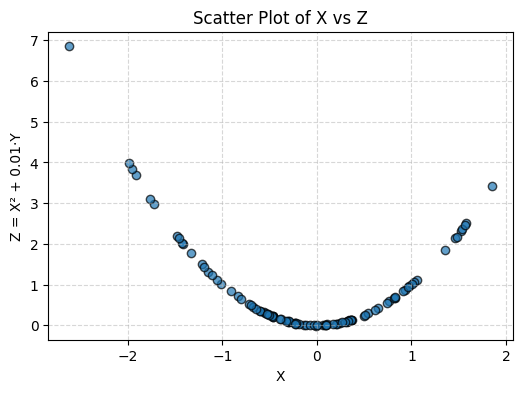

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Sample 100 values from standard normal
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)

# Compute Z = X^2 + 0.01 * Y
Z = X**2 + 0.01 * Y

# Plot the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X, Z, alpha=0.7, edgecolor='k')
plt.xlabel("X")
plt.ylabel("Z = X² + 0.01·Y")
plt.title("Scatter Plot of X vs Z")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


The shape indicates nonlinear dependence even though the correlation coefficient is close to 0,

C. Use the scatter plot to argue that $X$ and $Z$ are not independent.

**Answer:** Visual Argument from the Plot:

The plot reveals a parabolic curve, as X moves away from 0 in either direction, Z tends to increase.

This curve comes from the squared dependence in 𝑍 = 𝑋2 + 0.01𝑌.

The "U-shape" indicates that knowing the value of X gives you information about the expected value of Z.

In an independence scenario, the scatter would look like a random cloud, not a clear pattern or shape.

Key Insight:
Even though Corr(X,Z)≈0, the plot shows a strong nonlinear relationship between the variables.
<br><br>

D. Use the samples you took to estimate the variance of $Z$.

In [ ]:
import numpy as np

# Using X and Y defined from earlier
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
Z = X**2 + 0.01 * Y

# Estimate sample variance of Z
var_Z = np.var(Z, ddof=1)

print(f"Estimated variance of Z: {var_Z:.4f}")


Estimated variance of Z: 2.5110


E. Use the samples you took to estimate the covariance between $X$ and $Z$.

In [ ]:
import numpy as np

# Assume X, Y, Z are already defined:
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
Z = X**2 + 0.01 * Y

# Compute sample covariance matrix
cov_matrix = np.cov(X, Z, ddof=1)

# Extract covariance between X and Z
cov_XZ = cov_matrix[0, 1]

print(f"Estimated covariance between X and Z: {cov_XZ:.4f}")


Estimated covariance between X and Z: -0.1232


Interpretation: Even though Z=X 2 +0.01Y depends on X, the covariance may be close to zero.

Key point: Covariance (and correlation) measure only linear relationships.

F. Use the results above to find the correlation between $X$ and $Z$.

Sample covariance: Cov(X,Z)

Sample variance of X: Var(X)

Sample variance of Z: Var(Z)

In [ ]:
import numpy as np

# Assume X, Y, Z already defined from earlier
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
Z = X**2 + 0.01 * Y

# Compute variances
var_X = np.var(X, ddof=1)
var_Z = np.var(Z, ddof=1)

# Compute covariance
cov_XZ = np.cov(X, Z, ddof=1)[0, 1]

# Compute correlation
corr_XZ = cov_XZ / (np.sqrt(var_X) * np.sqrt(var_Z))

print(f"Correlation between X and Z: {corr_XZ:.4f}")


Correlation between X and Z: 0.0220


Interpretation:

The correlation is very close to 0, confirming that X and Z are uncorrelated.

However, from the earlier scatter plot, we saw that Z is clearly dependent on
X in a nonlinear way.

This proves the key concept that zero correlation does not prove independence.

G. The correlation coefficient you get may not be very close to zero. This is due to the fact that we estimate it with Monte Carlo averaging. To get a better estimate, we can increase the number of samples. Try increasing the number of samples to 1000 and see if the correlation coefficient gets closer to zero.

In [ ]:
import numpy as np

# Increase number of samples for better Monte Carlo estimation
np.random.seed(42)
n_samples = 1000

# Sample from standard normal
X = np.random.normal(0, 1, n_samples)
Y = np.random.normal(0, 1, n_samples)

# Compute Z = X^2 + 0.01 * Y
Z = X**2 + 0.01 * Y

# Compute variances
var_X = np.var(X, ddof=1)
var_Z = np.var(Z, ddof=1)

# Compute covariance
cov_XZ = np.cov(X, Z, ddof=1)[0, 1]

# Compute correlation
corr_XZ = cov_XZ / (np.sqrt(var_X) * np.sqrt(var_Z))

print(f"Correlation between X and Z (n=1000): {corr_XZ:.6f}")


Correlation between X and Z (n=1000): 0.108143


H. Let's do a more serious estimation of Monte Carlo convergence. Take 100,000 samples of $X$ and $Z$. Write code that estimates the correlation between $X$ and $Z$ using the first $n$ samples for $n=1,2,\ldots,100,000$. Plot the estimates as a function of $n$. What do you observe? How many samples do you need to get a good estimate of the correlation?


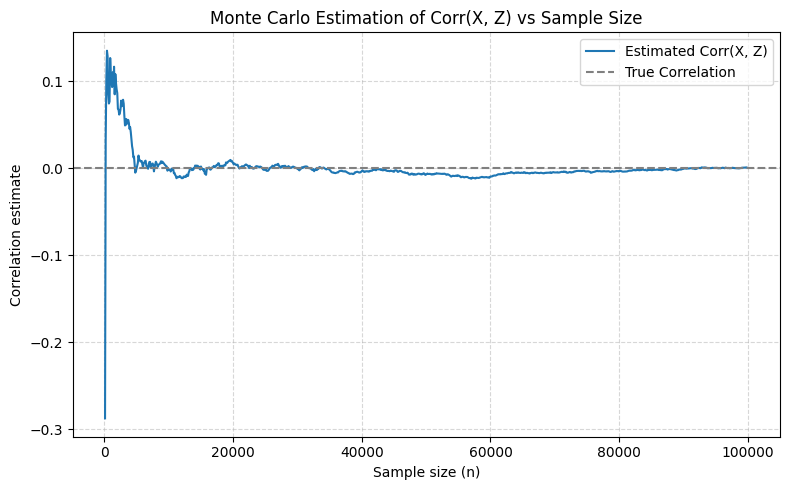

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Total number of samples
N = 100_000
np.random.seed(42)

# Sample from standard normal
X_full = np.random.normal(0, 1, N)
Y_full = np.random.normal(0, 1, N)
Z_full = X_full**2 + 0.01 * Y_full

# Estimate correlation incrementally
step = 100  # sample interval
sample_sizes = np.arange(step, N + 1, step)
correlations = []

for n in sample_sizes:
    X = X_full[:n]
    Z = Z_full[:n]
    corr = np.corrcoef(X, Z)[0, 1]
    correlations.append(corr)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, correlations, label='Estimated Corr(X, Z)')
plt.axhline(0, color='gray', linestyle='--', label='True Correlation')
plt.xlabel("Sample size (n)")
plt.ylabel("Correlation estimate")
plt.title("Monte Carlo Estimation of Corr(X, Z) vs Sample Size")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Problem 3 - Creating a stochastic model for the magnetic properties of steel

The magnetic properties of steel are captured in the so-called [$B-H$ curve](https://en.wikipedia.org/wiki/Saturation_(magnetic)), which connects the magnetic field $H$ to the magnetic flux density $B$.
The $B-H$ curve is a nonlinear function typically measured in the lab.
It appears in Maxwell's equations and is, therefore, crucial in the design of electrical machines.

The shape of the $B-H$ curve depends on the manufacturing process of the steel.
As a result, the $B-H$ differs across different suppliers but also across time for the same supplier.
The goal of this problem is to guide you through the process of creating a stochastic model for the $B-H$ curve using real data.
Such a model is the first step when we do uncertainty quantification for the design of electrical machines.
Once constructed, the stochastic model can generate random samples of the $B-H$ curve.
We can then propagate the uncertainty in the $B-H$ curve through Maxwell's equations to quantify the uncertainty in the performance of the electrical machine.

Let's use some actual manufacturer data to visualize the differences in the $B-H$ curve across different suppliers.
The data are [here](https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/homework/B_data.csv).
Explaining how to upload data on Google Colab will take a while.
We will do it in the next homework set.
You should know that the data file ``B_data.csv`` needs to be in the same working directory as this Jupyter Notebook.
I have written some code that allows you to put the data file in the right place without too much trouble.
Run the following:

In [ ]:
url = "https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/lecturebook/data/B_data.csv"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7324k  100 7324k    0     0  19.7M      0 --:--:-- --:--:-- --:--:-- 19.8M


If everything worked well, then the following will work:

In [ ]:
import numpy as np
B_data = np.loadtxt('B_data.csv')
B_data

array([[0.        , 0.00490631, 0.01913362, ..., 1.79321352, 1.79337681,
        1.79354006],
       [0.        , 0.00360282, 0.01426636, ..., 1.8367998 , 1.83697627,
        1.83715271],
       [0.        , 0.00365133, 0.01433438, ..., 1.77555287, 1.77570402,
        1.77585514],
       ...,
       [0.        , 0.00289346, 0.01154411, ..., 1.7668308 , 1.76697657,
        1.76712232],
       [0.        , 0.00809884, 0.03108513, ..., 1.7774044 , 1.77756225,
        1.77772007],
       [0.        , 0.00349638, 0.0139246 , ..., 1.76460358, 1.76474439,
        1.76488516]])

The shape of this dataset is:

In [ ]:
B_data.shape

(200, 1500)

The rows (200) correspond to different samples of the $B-H$ curves (suppliers and times).
The columns (1500) correspond to different values of $H$.
That is, the $i, j$ element is the value of $B$ at the specific value of $H$, say $H_j$. The values of $H$ are equidistant and identical; we will ignore them in this analysis.
Let's visualize some of the samples.

Here is one sample:

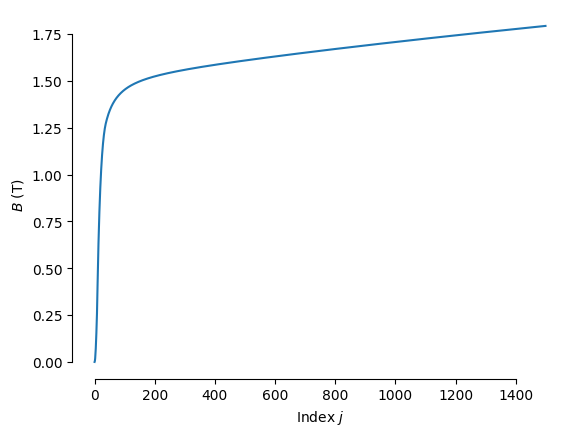

In [ ]:
import seaborn as sns

fig, ax = plt.subplots()
ax.plot(B_data[0, :])
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
sns.despine(trim=True);

Here are five samples:

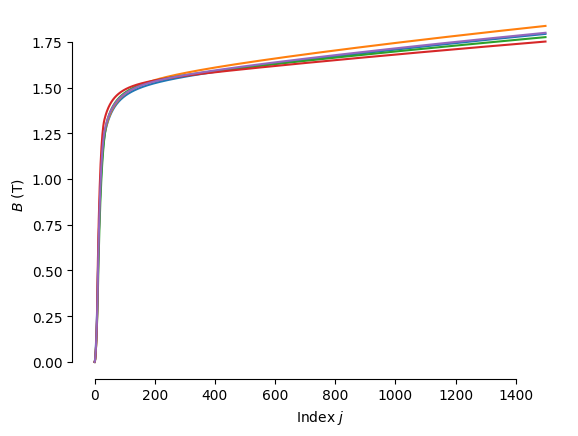

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[:5, :].T)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
sns.despine(trim=True);

Here are all the samples:

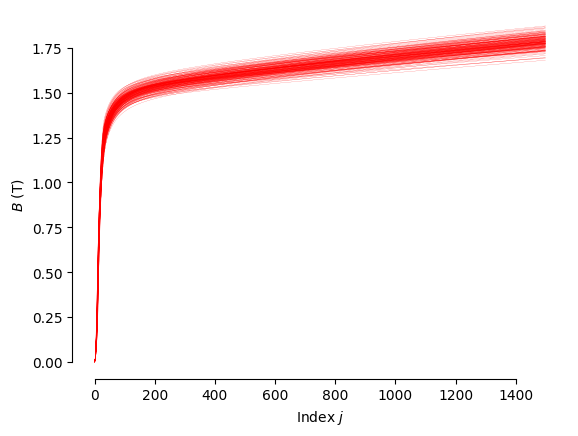

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[:, :].T, 'r', lw=0.1)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
sns.despine(trim=True);

A. We are going to start by studying the data at only one index. Say index $j=500$.
Let's define a random variable

$$
X = B(H_{500}),
$$

for this reason. Extract and do a histogram of the data for $X$:

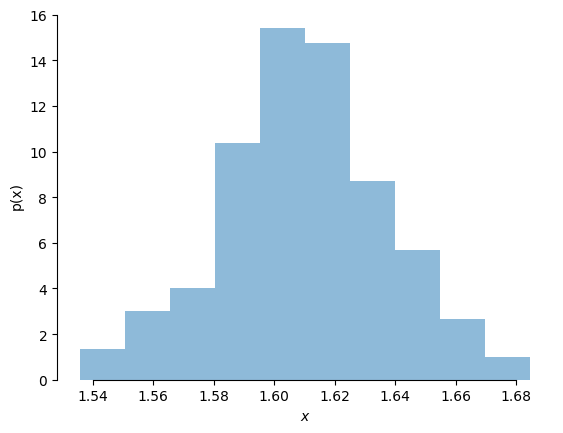

In [ ]:
X_data = B_data[:, 500]
fig, ax = plt.subplots()
ax.hist(X_data, alpha=0.5, density=True)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"p(x)")
sns.despine(trim=True);

This looks like a Gaussian $N(\mu_{500}, \sigma_{500}^2)$. Let's try to find a mean and variance for that Gaussian.
A good choice for the mean is the empirical average of the data:

$$
\mu_j = \frac{1}{N}\sum_{i=1}^NB_{ij}.
$$

By the law of large numbers, this is a good approximation of the true mean as $N\to\infty$.
Later we will learn that this is also the *maximum likelihood* estimate of the mean.

So, the mean is:

In [ ]:
mu_500 = X_data.mean()
print(f"mu_500 = {mu_500:.2f}")

mu_500 = 1.61


Similarly, for the variance a good choice is the empirical variance defined by:

$$
\sigma_j^2 = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)^2.
$$

This also converges to the true variance as $N\to\infty$.
Here it is:

In [ ]:
sigma2_500 = np.var(X_data)
print(f"sigma_500 = {sigma2_500:.2e}")

sigma_500 = 7.42e-04


Repeat the plot of the histogram of $X$ along with the PDF of the normal variable we have just identified using the functionality of ``scipy.stats``.

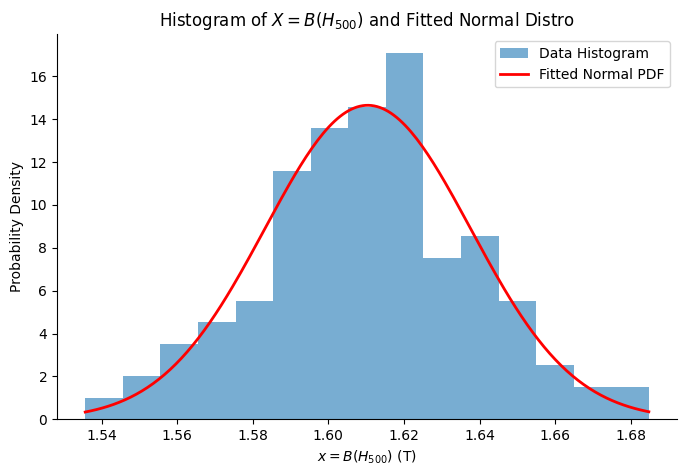

In [ ]:
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X_data = B_data[:, 500]

# Estimate mean and variance
mu_500 = X_data.mean()
sigma2_500 = np.var(X_data)
sigma_500 = np.sqrt(sigma2_500)

# Generate x-values for the PDF plot
x_fit = np.linspace(X_data.min(), X_data.max(), 200)

# Calculate the PDF of the fitted normal distribution
pdf_fit = st.norm.pdf(x_fit, loc=mu_500, scale=sigma_500)

# Plot the histogram and the fitted PDF
plt.figure(figsize=(8, 5))
plt.hist(X_data, bins=15, density=True, alpha=0.6, label='Data Histogram')
plt.plot(x_fit, pdf_fit, 'r-', lw=2, label='Fitted Normal PDF')
plt.title("Histogram of $X = B(H_{500})$ and Fitted Normal Distro")
plt.xlabel(r"$x = B(H_{500})$ (T)")
plt.ylabel("Probability Density")
plt.legend()
sns.despine()
plt.show()

B. Using your normal approximation to the PDF of $X$, find the probability that $X = B(H_{500})$ is greater than 1.66 T.

In [ ]:
# This can be found by integrating the PDF from 1.66 to infinity.
# This is equivalent to 1−P(X_1.66), where P(X_1.66) is the value of the CDF a
# using the survival function (sf), which is 1−CDF, from scipy.stats
prob_X_gt_1_66 = st.norm.sf(1.66, loc=mu_500, scale=sigma_500)
print(f"The probability that X > 1.66 T is: {prob_X_gt_1_66:.4f}")

The probability that X > 1.66 T is: 0.0344


C. Let us now consider another random variable

$$
Y = B(H_{1000}).
$$

Isolate the data for this as well:

In [ ]:
Y_data = B_data[:, 1000]

Do the ``scatter`` plot of $X$ and $Y$:

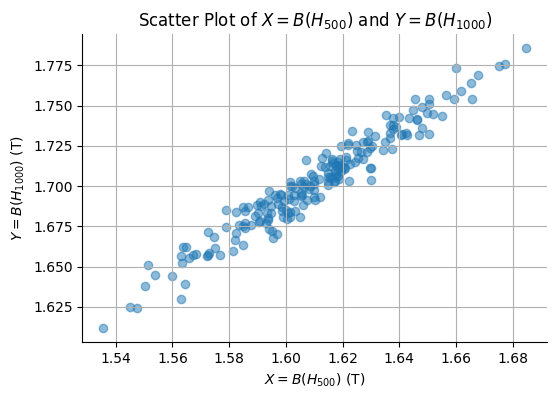

In [ ]:
X_data = B_data[:, 500]
Y_data = B_data[:, 1000]

# Plot the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X_data, Y_data, alpha=0.5)
plt.xlabel(r"$X=B(H_{500})$ (T)")
plt.ylabel(r"$Y=B(H_{1000})$ (T)")
plt.title(r"Scatter Plot of $X=B(H_{500})$ and $Y=B(H_{1000})$")
plt.grid(True)
sns.despine()
plt.show()

D. From the scatter plot, it looks like the random vector

$$
\mathbf{X} = (X, Y),
$$

follows a multivariate normal distribution. What would be the mean and covariance of the distribution?
First, organize the samples of $X$ and $Y$ in a matrix with the number of rows being the number of samples and two columns (one corresponding to $X$ and one to $Y$).

In [ ]:
XY_data = np.hstack([X_data[:, None], Y_data[:, None]])

In case you are wondering, the code above takes two 1D numpy arrays of the same size and puts them in a two-column numpy array. The first column is the first array, the second column is the second array. The result is a 2D numpy array.
We take sampling averages over the first axis of the array.

The mean vector is:

In [ ]:
mu_XY = np.mean(XY_data, axis=0)
print(f"mu_XY = {mu_XY}")

mu_XY = [1.61041566 1.70263681]


The covariance matrix is trickier.
We have already discussed how to find the diagonals of the covariance matrix (it is simply the variance).
For the off-diagonal terms, this is the formula that is being used:

$$
C_{jk} = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)(B_{ik} - \mu_k).
$$

This formula converges as $N\rightarrow\infty$.
Here is the implementation:

In [ ]:
# Careful with np.cov because it requires you to transpose the matrix we defined in class
C_XY = np.cov(XY_data.T)
print(f"C_XY =")
print(C_XY)

C_XY =
[[0.00074572 0.00082435]
 [0.00082435 0.00096729]]


Use the covariance matrix `C_XY` to find the correlation coefficient between $X$ and $Y$.

In [ ]:
# Calculate correlation from the covariance matrix
XY_data = np.hstack([X_data[:, None], Y_data[:, None]]) # [cite: 99]
C_XY = np.cov(XY_data.T) #
# Extract values from the covariance matrix
var_X = C_XY[0, 0]
var_Y = C_XY[1, 1]
cov_XY = C_XY[0, 1]
# Calculate the correlation coefficient
corr_XY = cov_XY / np.sqrt(var_X * var_Y)
print(f"Covariance Matrix C_XY:\n{C_XY}")
print(f"\nCorrelation coefficient between X and Y: {corr_XY:.4f}")

Covariance Matrix C_XY:
[[0.00074572 0.00082435]
 [0.00082435 0.00096729]]

Correlation coefficient between X and Y: 0.9706


Are the two variables $X$ and $Y$ positively or negatively correlated?<br>
<br>
**Answer:**
<br><br>

E. Use ``np.linalg.eigh`` to check that the matrix ``C_XY`` is indeed positive definite.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(C_XY)
print(f"Eigenvalues of C_XY: {eigenvalues}")

if np.all(eigenvalues > 0):
  print("All eigenvalues are positive. The matrix C_XY is positive definite.")
else:
  print("The matrix C_XY is not positive definite.")

Eigenvalues of C_XY: [2.47411589e-05 1.68827115e-03]
All eigenvalues are positive. The matrix C_XY is positive definite.


F. Use the functionality of ``scipy.stats.multivariate_normal`` to plot the joint probability function of the samples of $X$ and $Y$ in the same plot as the scatter plot of $X$ and $Y$.

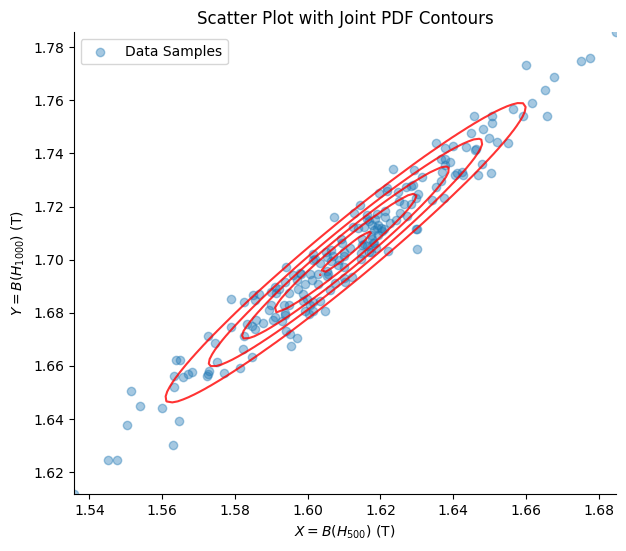

In [ ]:
mu_XY = np.mean(XY_data, axis=0) # [cite: 102]
# Create a grid of points
x_grid = np.linspace(X_data.min(), X_data.max(), 100)
y_grid = np.linspace(Y_data.min(), Y_data.max(), 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
pos = np.dstack((X_grid, Y_grid))
# Define the multivariate normal distribution
mvn = st.multivariate_normal(mu_XY, C_XY)
# Plot the PDF contours
plt.figure(figsize=(7, 6))
plt.scatter(X_data, Y_data, alpha=0.4, label='Data Samples')
plt.contour(X_grid, Y_grid, mvn.pdf(pos), levels=5, colors='red', alpha=0.8)
plt.title('Scatter Plot with Joint PDF Contours')
plt.xlabel(r'$X = B(H_{500})$ (T)')
plt.ylabel(r'$Y = B(H_{1000})$ (T)')
plt.legend()
sns.despine()
plt.show()

G. Now, consider each $B-H$ curve a random vector.
That is, the random vector $\mathbf{B}$ corresponds to the magnetic flux density values at a fixed number of $H$-values. It is:

$$
\mathbf{B} = (B(H_1), \dots, B(H_{1500})).
$$

It is like $\mathbf{X} = (X, Y)$ only now we have 1,500 dimensions instead of $2$.

First, let's find the mean of this random vector:

In [ ]:
B_mu = np.mean(B_data, axis=0)
B_mu

array([0.        , 0.00385192, 0.01517452, ..., 1.78373703, 1.78389267,
       1.78404828])

Let's plot the mean on top of all the data we have:

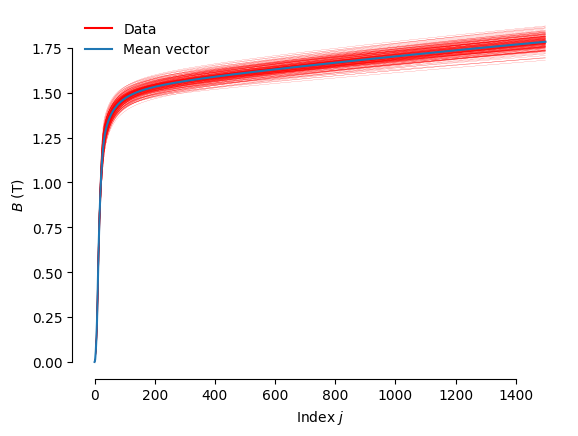

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[:, :].T, 'r', lw=0.1)
plt.plot([],[], 'r', label='Data')
ax.plot(B_mu, label="Mean vector")
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

It looks good. Now, find the covariance matrix of $\mathbf{B}$. This is going to be a 1500x1500 matrix.

In [ ]:
B_cov = np.cov(B_data.T)
B_cov

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.16277948e-06, 4.41977479e-06, ...,
        3.18233676e-06, 3.18391580e-06, 3.18549316e-06],
       [0.00000000e+00, 4.41977479e-06, 1.68041482e-05, ...,
        1.22832828e-05, 1.22890907e-05, 1.22948922e-05],
       ...,
       [0.00000000e+00, 3.18233676e-06, 1.22832828e-05, ...,
        1.20268920e-03, 1.20293022e-03, 1.20317114e-03],
       [0.00000000e+00, 3.18391580e-06, 1.22890907e-05, ...,
        1.20293022e-03, 1.20317134e-03, 1.20341237e-03],
       [0.00000000e+00, 3.18549316e-06, 1.22948922e-05, ...,
        1.20317114e-03, 1.20341237e-03, 1.20365351e-03]])

Let's plot this matrix:

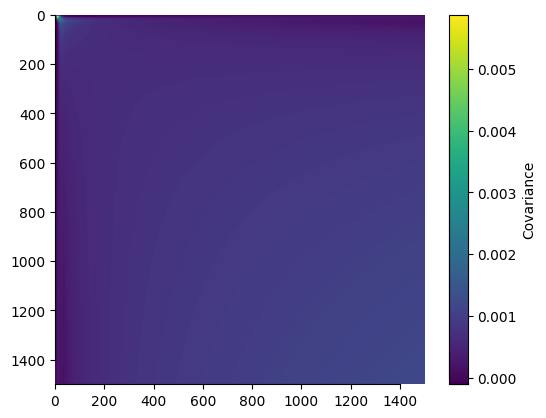

In [ ]:
fig, ax = plt.subplots()
c = ax.imshow(B_cov, interpolation='nearest')
plt.colorbar(c, label="Covariance")
sns.despine(trim=True);

The numbers are very small.
This is because the covariance depends on the units of the variables.
We need to do the same thing we did with the correlation coefficient: divide by the standard deviations of the variables.
Here is how you can get the correlation coefficients:

In [ ]:
# Note that I have to remove the first point because it is always zero
# and it has zero variance.
B_corr = np.corrcoef(B_data[:,1:].T)
B_corr

array([[1.        , 0.99986924, 0.99941799, ..., 0.08509827, 0.08512344,
        0.08514855],
       [0.99986924, 1.        , 0.99983894, ..., 0.08640313, 0.08642667,
        0.08645015],
       [0.99941799, 0.99983894, 1.        , ..., 0.08782484, 0.08784655,
        0.08786822],
       ...,
       [0.08509827, 0.08640313, 0.08782484, ..., 1.        , 0.99999998,
        0.9999999 ],
       [0.08512344, 0.08642667, 0.08784655, ..., 0.99999998, 1.        ,
        0.99999998],
       [0.08514855, 0.08645015, 0.08786822, ..., 0.9999999 , 0.99999998,
        1.        ]])

Here is the correlation visualized:

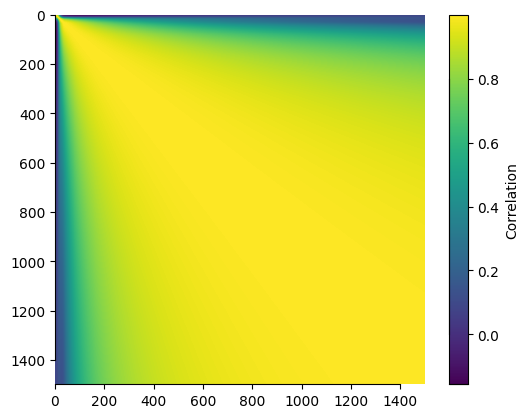

In [ ]:
fig, ax = plt.subplots()
c = ax.imshow(B_corr, interpolation='nearest')
plt.colorbar(c, label="Correlation")
sns.despine(trim=True);

The values are quite a bit correlated. This makes sense because the curves are all very smooth and look very much alike.

Let's check if the covariance is indeed positive definite:

In [ ]:
print("Eigenvalues of B_cov:")
print(np.linalg.eigh(B_cov)[0])

Eigenvalues of B_cov:
[-4.43233557e-16 -2.43956627e-16 -2.29458376e-16 ...  4.66244763e-02
  1.16644070e-01  1.20726782e+00]


Notice that several eigenvalues are negative, but they are too small. Very close to zero. This happens often in practice when you are finding the covariance of large random vectors. It arises from the fact that we use floating-point arithmetic instead of real numbers. It is a numerical artifact.
If you tried to use this covariance to make a multivariate average random vector using ``scipy.stats`` it would fail.
Try this:

In [ ]:
B = st.multivariate_normal(mean=B_mu, cov=B_cov)

LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

The way to overcome this problem is to add a small positive number to the diagonal. This needs to be very small so that the distribution stays mostly the same. It must be the smallest possible number that makes the covariance matrix behave well. This is known as the *jitter* or the *nugget*. Find the nugget playing with the code below. Every time you try, multiply the nugget by ten.

In [ ]:
# Pick the nugget here
nugget = 1e-12
# This is the modified covariance matrix
B_cov_w_nugget = B_cov + nugget * np.eye(B_cov.shape[0])
# Try building the distribution:
try:
    B = st.multivariate_normal(mean=B_mu, cov=B_cov_w_nugget)
    print('It worked! Move on.')
except:
    print('It did not work. Increase nugget by 10.')

It did not work. Increase nugget by 10.


In [ ]:
# Find the required nugget value
nugget_value = 1e-12
for i in range(10):
  nugget = nugget_value * (10**i)
  B_cov_nugget = B_cov + nugget * np.eye(B_cov.shape[0])
  try:
    # Try to create the distribution
    B_dist = st.multivariate_normal(mean=B_mu, cov=B_cov_nugget)
    print(f"It worked! The required nugget is ~{nugget:.1e}")
    break
  except np.linalg.LinAlgError:
    print(f"Did not work for nugget = {nugget:.1e}. Increasing nugget.")

Did not work for nugget = 1.0e-12. Increasing nugget.
Did not work for nugget = 1.0e-11. Increasing nugget.
Did not work for nugget = 1.0e-10. Increasing nugget.
It worked! The required nugget is ~1.0e-09


H. Now, you have created your first stochastic model of a complicated physical quantity. By sampling from your newly constructed random vector $\mathbf{B}$, you have essentially quantified your uncertainty about the $B-H$ curve as induced by the inability to control steel production perfectly. Take ten samples of this random vector and plot them.

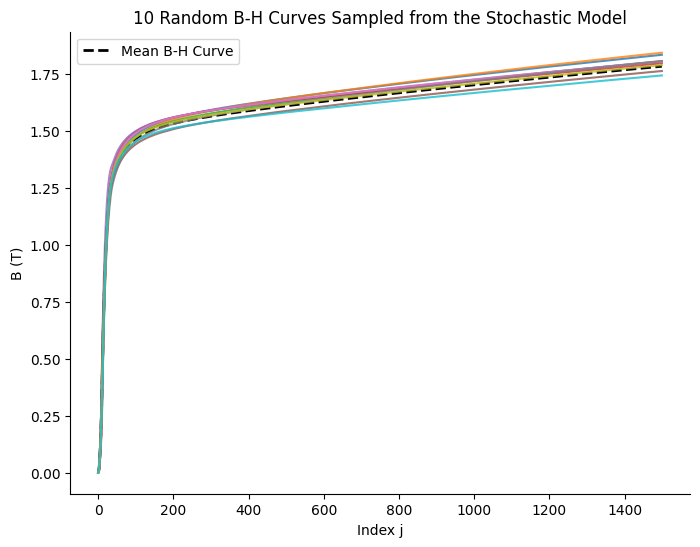

In [ ]:
num_bh_samples = 10
random_bh_curves = B_dist.rvs(size=num_bh_samples)
# Plot the samples
plt.figure(figsize=(8, 6))
# Plot the mean vector for reference
plt.plot(B_mu, 'k--', lw=2, label='Mean B-H Curve')
# Plot the 10 random samples
plt.plot(random_bh_curves.T, lw=1.5, alpha=0.8)
plt.title('10 Random B-H Curves Sampled from the Stochastic Model')
plt.xlabel('Index j')
plt.ylabel('B (T)')
plt.legend()
sns.despine()
plt.show()

Congratulations!
You have made your first stochastic model of a physical field quantity.
You can now sample $B-H$ curves in a way that honors the manufacturing uncertainties.
This is the first step in uncertainty quantification studies.
The next step would be to propagate these samples through Maxwell's equations to characterize the effect on the performance of an electric machine.
If you want to see how that looks, look at {cite}`sahu2020` and {cite}`beltran2020`.